# Problem set 2

## Question 1.1 a)

Welfare gain is defined as $ g $ such that:
$$ W((1+g)c_a) = W(c_b) $$
In this the case of eta = 1 (logarithmic utility function), gain is such that:
$$ E{ \sum^{40}_{t=1} \beta^{12(t-1)} [ \sum^{12}_{m=1} \beta^{m-1}[\log(1+g)c_{m,t}^{Risk}]] }= \sum^{40}_{t=1} \beta^{12(t-1)} [ \sum^{12}_{m=1} \beta^{m-1}[\log c_{m,t}^{No Risk}]] $$
thus,
$$ \sum^{40}_{t=1} \beta^{12(t-1)} \sum^{12}_{m=1} \beta^{m-1} \log (1+g) + E\sum^{40}_{t=1} \beta^{12(t-1)} \sum^{12}_{m=1} \beta^{m-1} \log c_{m,t}^{Risk} = \sum^{40}_{t=1} \beta^{12(t-1)} [ \sum^{12}_{m=1} \beta^{m-1}[\log c_{m,t}^{No Risk}]]$$

and,
$$  \log(1+g) = \frac{\sum^{40}_{t=1} \beta^{12(t-1)} [ \sum^{12}_{m=1} \beta^{m-1}[\log c_{m,t}^{No Risk}]] - E\sum^{40}_{t=1} \beta^{12(t-1)} \sum^{12}_{m=1} \beta^{m-1} \log c_{m,t}^{Risk}}{\sum^{40}_{t=1} \beta^{12(t-1)} \sum^{12}_{m=1} \beta^{m-1}} $$

so, 

$$ g = \exp({\frac{\sum^{40}_{t=1} \beta^{12(t-1)} [ \sum^{12}_{m=1} \beta^{m-1}[\log c_{m,t}^{No Risk}]] - E\sum^{40}_{t=1} \beta^{12(t-1)} \sum^{12}_{m=1} \beta^{m-1} \log c_{m,t}^{Risk}}{\sum^{40}_{t=1} \beta^{12(t-1)} \sum^{12}_{m=1} \beta^{m-1}}}) - 1$$

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
var_e = 0.2
var_u = 0.2

ln_e = np.random.normal(0,var_e, size=(1000,40,12))
ln_z = np.random.normal(0,var_u, size=(1000))



def g(level):
    g = pd.DataFrame({'middle': [-0.147,-0.37,0.141,0.131,0.09,0.058,0.036,0.036,0.036,0.002,-0.033,-0.082],
                  'high': [-0.293,-0.739,0.282,0.262,0.18,0.116,0.072,0.072,0.072,0.004,-0.066,-0.164],
                  'low': [-0.073,-0.185,0.071,0.066,0.045,0.029,0.018,0.018,0.018,0.001,-0.017,-0.041]})[level]
    return g

def var_m(level):
    var_m = pd.DataFrame({'middle': [0.085,0.068,0.29,0.283,0.273,0.273,0.239,0.205,0.188,0.188,0.171,0.137],
                       'high': [0.171,0.137,0.58,0.567,0.546,0.546,0.478,0.41,0.376,0.376,0.341,0.273],
                       'low': [0.043,0.034,0.145,0.142,0.137,0.137,0.119,0.102,0.094,0.094,0.085,0.068],
                       'none': [0,0,0,0,0,0,0,0,0,0,0,0]})[level]
    return var_m

In [4]:
# Q1 eta 1 = log consumption    
def c_1_a(g_level):
    c_no_risk = np.zeros(shape=(1000, 40*12))
    c_risk = np.zeros(shape=(1000, 40*12))
    g_deter = g(g_level)
    for i in range(1000):
        for o in range(40*12):
            c_no_risk[i][o] = np.exp(-var_u/2)*np.exp(ln_z[i])*np.exp(-var_e/2)*np.exp(ln_e[i][math.floor(o/12)][o%12])
            c_risk[i][o] = np.exp(-var_u/2)*np.exp(ln_z[i])*(np.exp(g_deter[o%12]))*np.exp(-var_e/2)*np.exp(ln_e[i][math.floor(o/12)][o%12]) 
    return c_no_risk, c_risk

def gain_1_a(c_1_a_no_risk, c_1_a_risk):
    gain = np.zeros(1000)
    for i in range(1000):
        gain[i] = np.exp((sum(np.power(0.99, range(1,481))*np.log(c_1_a_no_risk[i]))-sum(np.power(0.99, range(1,481))*np.log(c_1_a_risk[i])))/sum(np.power(0.99, range(1,481))))-1
    return gain

In [5]:
# high 
c_1_a_no_risk_high, c_1_a_risk_high = c_1_a('high')         
gain_1_a_high = gain_1_a(c_1_a_no_risk_high, c_1_a_risk_high)

# middle 
c_1_a_no_risk_middle, c_1_a_risk_middle = c_1_a('middle')               
gain_1_a_middle = gain_1_a(c_1_a_no_risk_middle, c_1_a_risk_middle)

# low
c_1_a_no_risk_low, c_1_a_risk_low = c_1_a('low')          
gain_1_a_low = gain_1_a(c_1_a_no_risk_low, c_1_a_risk_low)

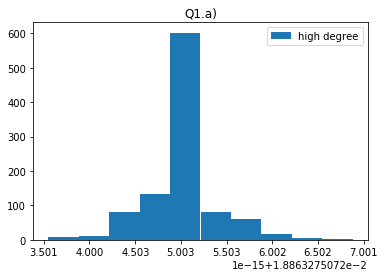

In [6]:
plt.hist(gain_1_a_high, label="high degree")
plt.title("Q1.a)")
plt.legend()

#Actually all HHs get the same welfare gain which is negligible

## Question 1.1. b)

In [6]:
def c_1_b(g_level):
    c_no_risk = np.zeros(shape=(1000, 40*12))
    c_risk = np.zeros(shape=(1000, 40*12))
    g_deter = g(g_level)
    for i in range(1000):
        for o in range(40*12):
            c_no_risk[i][o] = np.exp(-var_u/2)*np.exp(ln_z[i])*(np.exp(g_deter[o%12]))
            c_risk[i][o] = np.exp(-var_u/2)*np.exp(ln_z[i])*(np.exp(g_deter[o%12]))*np.exp(-var_e/2)*np.exp(ln_e[i][math.floor(o/12)][o%12]) 
    return c_no_risk, c_risk
            
def gain_1_b(c_1_no_risk, c_1_risk):
    gain = np.zeros(1000)
    for i in range(1000):
        gain[i] = np.exp((sum(np.power(0.99, range(1,481))*np.log(c_1_no_risk[i]))-sum(np.power(0.99, range(1,481))*np.log(c_1_risk[i])))/sum(np.power(0.99, range(1,481))))-1
    return gain

In [7]:
c_1_b_no_risk, c_1_b_risk = c_1_b('middle')         
gain_1_b_middle = gain_1_b(c_1_b_no_risk, c_1_b_risk)

<function matplotlib.pyplot.show>

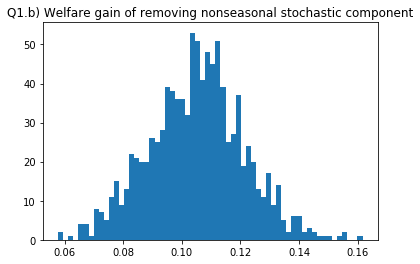

In [8]:
plt.hist(gain_1_b_middle, bins = 60)
plt.title("Q1.b) Welfare gain of removing nonseasonal stochastic component")
plt.show

## Question 1.1. c)

To be confirmed

## Question 1.1. d)

### eta = 2

$$ E{ \sum^{40}_{t=1} \beta^{12(t-1)} [ \sum^{12}_{m=1} \beta^{m-1}[\frac{[(1+g)c_{m,t}^{Risk}]^{(1-\eta)}}{1-\eta}]] }= \sum^{40}_{t=1} \beta^{12(t-1)} [ \sum^{12}_{m=1} \beta^{m-1}[\frac{c_{m,t}^{No Risk^{(1-\eta)}}}{1-\eta}]] $$
thus,

$$ g = [\frac{\sum^{40}_{t=1} \beta^{t-1} \sum^{12}_{m=1} \beta^{m-1} \frac{(c_{m,t}^{No Risk})^{1-\eta}}{1-\eta}}{ E\sum^{40}_{t=1} \beta^{t-1} \sum^{12}_{m=1} \beta^{m-1} \frac{(c_{m,t}^{Risk})^{1-\eta}}{1-\eta}}]^{\frac{1}{1-\eta}} - 1$$

### Removing seasonal component

In [21]:
def gain_1_da_eta2(c_1_da_eta2_no_risk, c_1_da_eta2_risk):
    eta = 2
    gain = np.zeros(1000)
    for i in range(1000):
        gain[i] = (sum(np.power(0.99, range(1,481))*np.power(c_1_da_eta2_no_risk[i],(1-eta)/(1-eta)))/  sum(np.power(0.99, range(1,481))*np.power(c_1_da_eta2_risk[i],(1-eta)/(1-eta))) )**(1/(1-eta))-1 #-sum(np.power(0.99, range(1,481))*(c_1_da_eta2risk[i])**(1-eta)/(1-eta))/sum(np.power(0.99, range(1,481))))-1
    return gain

In [22]:
#high   
gain_1_da_eta2_high = gain_1_da_eta2(c_1_a_no_risk_high, c_1_a_risk_high)

# middle            
gain_1_da_eta2_middle = gain_1_da_eta2(c_1_a_no_risk_middle, c_1_a_risk_middle)

# low      
gain_1_da_eta2_low = gain_1_da_eta2(c_1_a_no_risk_low, c_1_a_risk_low)

Text(0.5,1,'Q1.d) Welfare gains of removing the seasonal component by degree of seasonality, eta = 2')

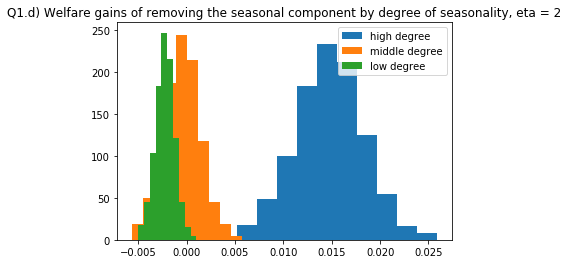

In [23]:
# plot histograms
plt.hist(gain_1_da_eta2_high, label="high degree")
plt.hist(gain_1_da_eta2_middle, label="middle degree")
plt.hist(gain_1_da_eta2_low, label="low degree")
plt.legend()
plt.title("Q1.d) Welfare gains of removing the seasonal component by degree of seasonality, eta = 2")

### Removing nonseasonal stochastic component

In [26]:
def gain_1_db(c_1_no_risk, c_1_risk):
    eta = 2
    gain = np.zeros(1000)
    for i in range(1000):
        gain[i] = (sum(np.power(0.99, range(1,481))*np.power(c_1_no_risk[i],(1-eta)/(1-eta)))/  sum(np.power(0.99, range(1,481))*np.power(c_1_risk[i],(1-eta)/(1-eta))) )**(1/(1-eta))-1 #-sum(np.power(0.99, range(1,481))*(c_1_da_eta2risk[i])**(1-eta)/(1-eta))/sum(np.power(0.99, range(1,481))))-1
    return gain

In [27]:
# removal of nonseasonal risk 
gain_1_db_eta2 = gain_1_db(c_1_b_no_risk, c_1_b_risk)

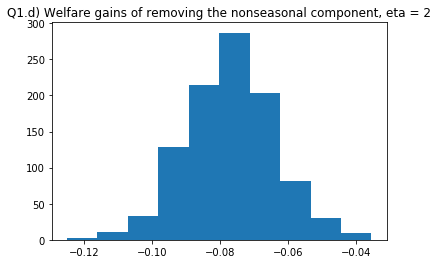

In [43]:
# plot histograms
plt.hist(gain_1_db_eta2)
plt.title("Q1.d) Welfare gains of removing the nonseasonal component, eta = 2")
plt.show()

### eta = 4

### Removing seasonal component

In [30]:
def gain_1_da_eta4(c_1_da_no_risk, c_1_da_risk):
    eta = 4
    gain = np.zeros(1000)
    for i in range(1000):
        gain[i] = (sum(np.power(0.99, range(1,481))*np.power(c_1_da_no_risk[i],(1-eta)/(1-eta)))/  sum(np.power(0.99, range(1,481))*np.power(c_1_da_risk[i],(1-eta)/(1-eta))) )**(1/(1-eta))-1 #-sum(np.power(0.99, range(1,481))*(c_1_da_eta2risk[i])**(1-eta)/(1-eta))/sum(np.power(0.99, range(1,481))))-1
    return gain

In [31]:
#high   
gain_1_da_eta4_high = gain_1_da_eta4(c_1_a_no_risk_high, c_1_a_risk_high)

# middle            
gain_1_da_eta4_middle = gain_1_da_eta4(c_1_a_no_risk_middle, c_1_a_risk_middle)

# low      
gain_1_da_eta4_low = gain_1_da_eta4(c_1_a_no_risk_low, c_1_a_risk_low)

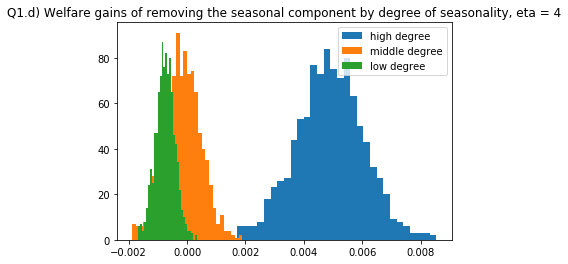

In [44]:
# plot histograms
plt.hist(gain_1_da_eta4_high, label="high degree", bins=30)
plt.hist(gain_1_da_eta4_middle, label="middle degree",bins=30)
plt.hist(gain_1_da_eta4_low, label="low degree",bins=30)
plt.legend()
plt.title("Q1.d) Welfare gains of removing the seasonal component by degree of seasonality, eta = 4")
plt.show()

### Removing nonseasonal component

In [35]:
def gain_1_db_eta4(c_1_no_risk, c_1_risk):
    eta=4
    gain = np.zeros(1000)
    for i in range(1000):
        gain[i] = np.exp(((sum(np.power(0.99, range(1,481))*(c_1_no_risk[i])**(1-eta)/(1-eta)))-sum(np.power(0.99, range(1,481))*(c_1_risk[i])**(1-eta)/(1-eta)))/sum(np.power(0.99, range(1,481))))-1
    return gain

In [36]:
# middle 
gain_1_db_eta4 = gain_1_db_eta4(c_1_b_no_risk, c_1_b_risk)

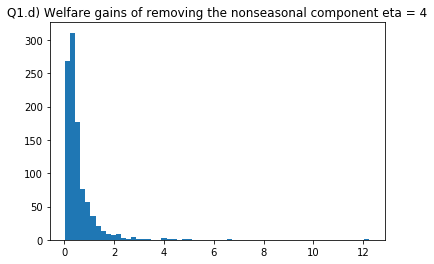

In [45]:
# plot histograms
plt.hist(gain_1_db_eta4, bins=60)
plt.title("Q1.d) Welfare gains of removing the nonseasonal component eta = 4")
plt.show()

## Compare eta 1, 2, 4

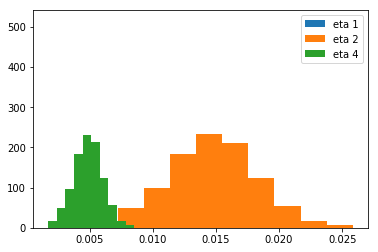

In [69]:
plt.hist(gain_1_a_high, label="eta 1")
plt.hist(gain_1_da_eta2_high, label="eta 2")
plt.hist(gain_1_da_eta4_high, label="eta 4")
#plt.xlim(0.01, 0.025)
plt.legend()

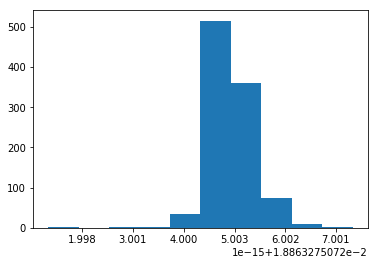

In [50]:
plt.hist(gain_1_a_high, label="eta 1", bins=4)
plt.show()

In [65]:
np.mean(gain_1_a_high)

0.018863275071624976

## Question 1.2. a)

### removing Stochastic Seasonal Component

In [3]:
def c_1_2_a(g_level, var_m_level):
    c_no_risk = np.zeros(shape=(1000, 40*12))
    c_risk = np.zeros(shape=(1000, 40*12))
    g_deter = g(g_level)
    var_m_stoch = var_m(var_m_level)
    ln_em = np.random.normal(0,var_m_stoch, size=(1000,40,12))
    
    for i in range(1000):
        for o in range(40*12):
            c_no_risk[i][o] = np.exp(-var_u/2)*np.exp(ln_z[i])*np.exp(-var_e/2)*np.exp(ln_e[i][math.floor(o/12)][o%12])
            c_risk[i][o] = np.exp(-var_u/2)*np.exp(ln_z[i])*np.exp(g_deter[o%12])*np.exp(-var_e/2)*np.exp(ln_e[i][math.floor(o/12)][o%12])*np.exp(-var_m_stoch[o%12]/2)*np.exp(ln_em[i][math.floor(o/12)][o%12]) 
    return c_no_risk, c_risk

def gain_1_2_a(c_1_a_no_risk, c_1_a_risk):
    gain = np.zeros(1000)
    for i in range(1000):
        gain[i] = np.exp((sum(np.power(0.99, range(1,481))*np.log(c_1_a_no_risk[i]))-sum(np.power(0.99, range(1,481))*np.log(c_1_a_risk[i])))/sum(np.power(0.99, range(1,481))))-1
    return gain

#### for Deterministic Seasonal Component on high degree

In [9]:
# high seasonal deterministic, high stochastic seasonas component
c_1_2_a_no_risk_high_high, c_1_2_a_risk_high_high = c_1_2_a('high', 'high')         
gain_1_2_a_high_high = gain_1_2_a(c_1_2_a_no_risk_high_high, c_1_2_a_risk_high_high)

# high seasonal deterministic, middle stochastic seasonas component
c_1_2_a_no_risk_high_middle, c_1_2_a_risk_high_middle = c_1_2_a('high', 'middle')               
gain_1_2_a_high_middle = gain_1_2_a(c_1_2_a_no_risk_high_middle, c_1_2_a_risk_high_middle)

# high seasonal deterministic, low stochastic seasonas component
c_1_2_a_no_risk_high_low, c_1_2_a_risk_high_low = c_1_2_a('high', 'low')          
gain_1_2_a_high_low = gain_1_2_a(c_1_2_a_no_risk_high_low, c_1_2_a_risk_high_low)

Text(0.5,1,'Gain of removal of seasonal components. Deterministic seasonal component fixed at high degree')

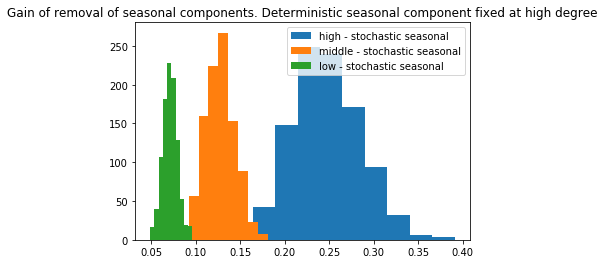

In [10]:
plt.hist(gain_1_2_a_high_high, label="high - stochastic seasonal")
plt.hist(gain_1_2_a_high_middle, label="middle - stochastic seasonal")
plt.hist(gain_1_2_a_high_low, label="low - stochastic seasonal")
#plt.xlim(0.01, 0.025)
plt.legend()
plt.title("Gain of removal of seasonal components. Deterministic seasonal component fixed at high degree")

#### for Deterministic Seasonal Component on middle degree

In [11]:
# middle seasonal deterministic, high stochastic seasonas component
c_1_2_a_no_risk_middle_high, c_1_2_a_risk_middle_high = c_1_2_a('middle', 'high')         
gain_1_2_a_middle_high = gain_1_2_a(c_1_2_a_no_risk_middle_high, c_1_2_a_risk_middle_high)

# middle seasonal deterministic, middle stochastic seasonas component
c_1_2_a_no_risk_middle_middle, c_1_2_a_risk_middle_middle = c_1_2_a('middle', 'middle')               
gain_1_2_a_middle_middle = gain_1_2_a(c_1_2_a_no_risk_middle_middle, c_1_2_a_risk_middle_middle)

# middle seasonal deterministic, low stochastic seasonas component
c_1_2_a_no_risk_middle_low, c_1_2_a_risk_middle_low = c_1_2_a('middle', 'low')          
gain_1_2_a_middle_low = gain_1_2_a(c_1_2_a_no_risk_middle_low, c_1_2_a_risk_middle_low)

Text(0.5,1,'Gain of removal of seasonal components. Deterministic component fixed at middle degree')

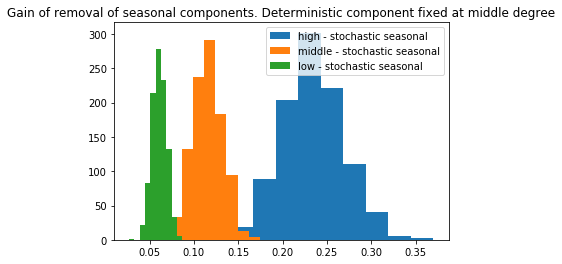

In [12]:
plt.hist(gain_1_2_a_middle_high, label="high - stochastic seasonal")
plt.hist(gain_1_2_a_middle_middle, label="middle - stochastic seasonal")
plt.hist(gain_1_2_a_middle_low, label="low - stochastic seasonal")
plt.legend()
plt.title("Gain of removal of seasonal components. Deterministic component fixed at middle degree")

#### for Deterministic Seasonal Component on low degree

In [4]:
# low seasonal deterministic, high stochastic seasonas component
c_1_2_a_no_risk_low_high, c_1_2_a_risk_low_high = c_1_2_a('low', 'high')         
gain_1_2_a_low_high = gain_1_2_a(c_1_2_a_no_risk_low_high, c_1_2_a_risk_low_high)

# low seasonal deterministic, middle stochastic seasonas component
c_1_2_a_no_risk_low_middle, c_1_2_a_risk_low_middle = c_1_2_a('low', 'middle')               
gain_1_2_a_low_middle = gain_1_2_a(c_1_2_a_no_risk_low_middle, c_1_2_a_risk_low_middle)

# low seasonal deterministic, low stochastic seasonas component
c_1_2_a_no_risk_low_low, c_1_2_a_risk_low_low = c_1_2_a('low', 'low')          
gain_1_2_a_low_low = gain_1_2_a(c_1_2_a_no_risk_low_low, c_1_2_a_risk_low_low)

Text(0.5,1,'Gain of removal of stochastic seasonal component. Deterministic seasonal component has low degree')

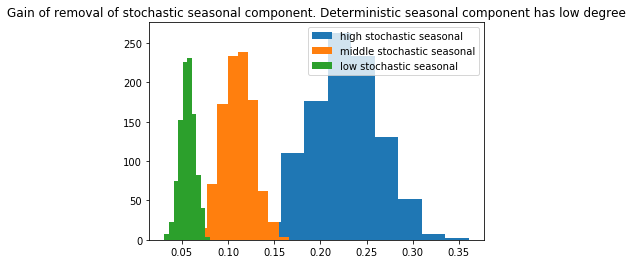

In [5]:
plt.hist(gain_1_2_a_low_high, label="high stochastic seasonal")
plt.hist(gain_1_2_a_low_middle, label="middle stochastic seasonal")
plt.hist(gain_1_2_a_low_low, label="low stochastic seasonal")
plt.legend()
plt.title("Gain of removal of stochastic seasonal component. Deterministic seasonal component has low degree")

#### Compare pairs (deterministic, stochastic): (high, high), (middle, middle), (low, low)

Text(0.5,1,'Gain of removal of stochastic seasonal component. Deterministic seasonal component has low degree')

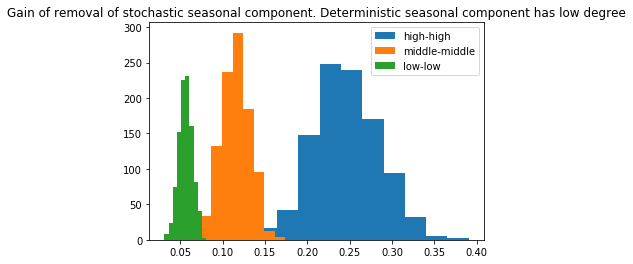

In [13]:
plt.hist(gain_1_2_a_high_high, label="high-high")
plt.hist(gain_1_2_a_middle_middle, label="middle-middle")
plt.hist(gain_1_2_a_low_low, label="low-low")
plt.legend()
plt.title("Gain of removal of stochastic seasonal component. Deterministic seasonal component has low degree")

## Question 1.2. b) Removing nonseasonal stochastic component

### eta = 1

In [14]:
def c_1_2_b(g_level, var_m_level):
    c_no_risk = np.zeros(shape=(1000, 40*12))
    c_risk = np.zeros(shape=(1000, 40*12))
    g_deter = g(g_level)
    var_m_stoch = var_m(var_m_level)
    ln_em = np.random.normal(0,var_m_stoch, size=(1000,40,12))
    for i in range(1000):
        for o in range(40*12):
            c_no_risk[i][o] = np.exp(-var_u/2)*np.exp(ln_z[i])*np.exp(g_deter[o%12])*np.exp(-var_m_stoch[o%12]/2)*np.exp(ln_em[i][math.floor(o/12)][o%12])
            c_risk[i][o] = np.exp(-var_u/2)*np.exp(ln_z[i])*np.exp(g_deter[o%12])*np.exp(-var_e/2)*np.exp(ln_e[i][math.floor(o/12)][o%12])*np.exp(-var_m_stoch[o%12]/2)*np.exp(ln_em[i][math.floor(o/12)][o%12]) 
    return c_no_risk, c_risk

def gain_1_2_b(c_1_a_no_risk, c_1_a_risk):
    gain = np.zeros(1000)
    for i in range(1000):
        gain[i] = np.exp((sum(np.power(0.99, range(1,481))*np.log(c_1_a_no_risk[i]))-sum(np.power(0.99, range(1,481))*np.log(c_1_a_risk[i])))/sum(np.power(0.99, range(1,481))))-1
    return gain

In [15]:
# middle seasonal deterministic, middle stochastic seasonas component
c_1_2_b_no_risk_middle_middle, c_1_2_b_risk_middle_middle = c_1_2_b('middle', 'middle')               
gain_1_2_b_middle_middle = gain_1_2_b(c_1_2_b_no_risk_middle_middle, c_1_2_b_risk_middle_middle)

Text(0.5,1,'Gain of removal of stochastic nonseasonal component. Seasonal components on middle degree')

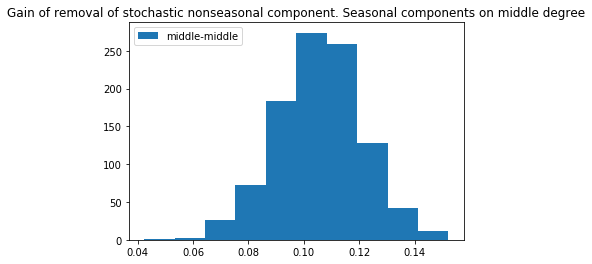

In [16]:
plt.hist(gain_1_2_b_middle_middle, label="middle-middle")
plt.legend()
plt.title("Gain of removal of stochastic nonseasonal component. Seasonal components on middle degree")

### Compare 1.1. b) and 1.2. b)

Text(0.5,1,'Gain of removal of stochastic nonseasonal component. Seasonal components on middle degree')

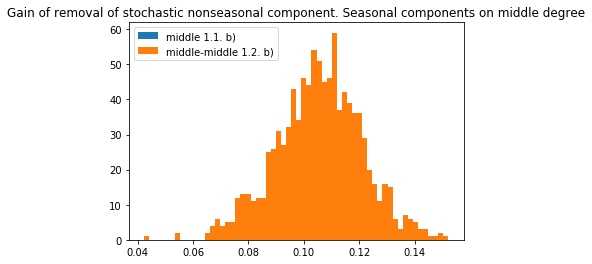

In [31]:
plt.hist(gain_1_b_middle, bins = 60, label="middle 1.1. b)")
plt.hist(gain_1_2_b_middle_middle, bins=60, label="middle-middle 1.2. b)")
plt.legend()
plt.title("Gain of removal of stochastic nonseasonal component. Seasonal components on middle degree")

# Question 1.2. d) 

## eta = 4

In [32]:
def gain_1_2_d(c_1_a_no_risk, c_1_a_risk):
    eta = 4
    gain = np.zeros(1000)
    for i in range(1000):
        gain[i] = (sum(np.power(0.99, range(1,481))*np.power(c_1_da_no_risk[i],(1-eta)/(1-eta)))/  sum(np.power(0.99, range(1,481))*np.power(c_1_da_risk[i],(1-eta)/(1-eta))) )**(1/(1-eta))-1 #-sum(np.power(0.99, range(1,481))*(c_1_da_eta2risk[i])**(1-eta)/(1-eta))/sum(np.power(0.99, range(1,481))))-1
    return gain

#### for Deterministic Seasonal Component on high degree

In [33]:
# high seasonal deterministic, high stochastic seasonas component
c_1_2_d_no_risk_high_high, c_1_2_d_risk_high_high = c_1_2_a('high', 'high')         
gain_1_2_d_high_high = gain_1_2_d(c_1_2_d_no_risk_high_high, c_1_2_d_risk_high_high)

# high seasonal deterministic, middle stochastic seasonas component
c_1_2_d_no_risk_high_middle, c_1_2_d_risk_high_middle = c_1_2_d('high', 'middle')               
gain_1_2_d_high_middle = gain_1_2_d(c_1_2_d_no_risk_high_middle, c_1_2_d_risk_high_middle)

# high seasonal deterministic, low stochastic seasonas component
c_1_2_d_no_risk_high_low, c_1_2_d_risk_high_low = c_1_2_d('high', 'low')          
gain_1_2_d_high_low = gain_1_2_d(c_1_2_d_no_risk_high_low, c_1_2_d_risk_high_low)

NameError: name 'c_1_da_no_risk' is not defined

In [ ]:
plt.hist(gain_1_2_d_high_high, label="high - stochastic seasonal")
plt.hist(gain_1_2_d_high_middle, label="middle - stochastic seasonal")
plt.hist(gain_1_2_d_high_low, label="low - stochastic seasonal")
#plt.xlim(0.01, 0.025)
plt.legend()
plt.title("Gain of removal of seasonal components. Deterministic seasonal component fixed at high degree")

#### for Deterministic Seasonal Component on middle degree

In [11]:
# middle seasonal deterministic, high stochastic seasonas component
c_1_2_d_no_risk_middle_high, c_1_2_d_risk_middle_high = c_1_2_d('middle', 'high')         
gain_1_2_d_middle_high = gain_1_2_d(c_1_2_d_no_risk_middle_high, c_1_2_d_risk_middle_high)

# middle seasonal deterministic, middle stochastic seasonas component
c_1_2_d_no_risk_middle_middle, c_1_2_d_risk_middle_middle = c_1_2_d('middle', 'middle')               
gain_1_2_d_middle_middle = gain_1_2_d(c_1_2_d_no_risk_middle_middle, c_1_2_d_risk_middle_middle)

# middle seasonal deterministic, low stochastic seasonas component
c_1_2_d_no_risk_middle_low, c_1_2_d_risk_middle_low = c_1_2_d('middle', 'low')          
gain_1_2_d_middle_low = gain_1_2_d(c_1_2_d_no_risk_middle_low, c_1_2_d_risk_middle_low)

Text(0.5,1,'Gain of removal of seasonal components. Deterministic component fixed at middle degree')

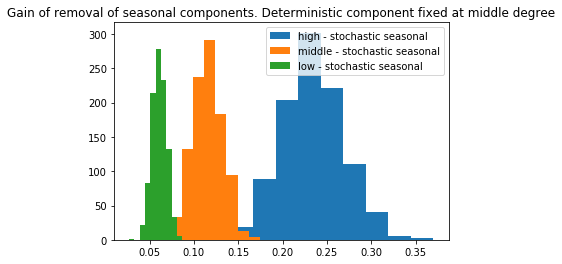

In [12]:
plt.hist(gain_1_2_d_middle_high, label="high - stochastic seasonal")
plt.hist(gain_1_2_d_middle_middle, label="middle - stochastic seasonal")
plt.hist(gain_1_2_d_middle_low, label="low - stochastic seasonal")
plt.legend()
plt.title("Gain of removal of seasonal components. Deterministic component fixed at middle degree")

#### for Deterministic Seasonal Component on low degree

In [45]:
# low seasonal deterministic, high stochastic seasonas component
c_1_2_d_no_risk_low_high, c_1_2_d_risk_low_high = c_1_2_d('low', 'high')         
gain_1_2_d_low_high = gain_1_2_d(c_1_2_d_no_risk_low_high, c_1_2_d_risk_low_high)

# low seasonal deterministic, middle stochastic seasonas component
c_1_2_d_no_risk_low_middle, c_1_2_d_risk_low_middle = c_1_2_d('low', 'middle')               
gain_1_2_d_low_middle = gain_1_2_d(c_1_2_d_no_risk_low_middle, c_1_2_d_risk_low_middle)

# low seasonal deterministic, low stochastic seasonas component
c_1_2_d_no_risk_low_low, c_1_2_d_risk_low_low = c_1_2_d('low', 'low')          
gain_1_2_d_low_low = gain_1_2_d(c_1_2_d_no_risk_low_low, c_1_2_d_risk_low_low)

NameError: name 'c_1_2_d' is not defined

Text(0.5,1,'Gain of removal of stochastic seasonal component. Deterministic seasonal component has low degree')

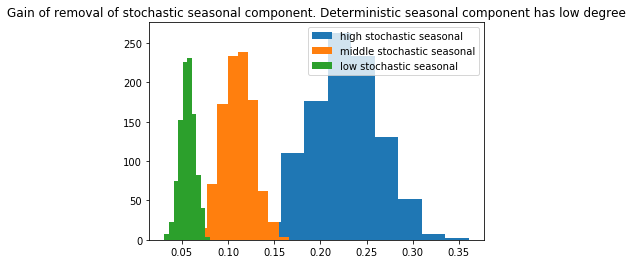

In [5]:
plt.hist(gain_1_2_d_low_high, label="high stochastic seasonal")
plt.hist(gain_1_2_d_low_middle, label="middle stochastic seasonal")
plt.hist(gain_1_2_d_low_low, label="low stochastic seasonal")
plt.legend()
plt.title("Gain of removal of stochastic seasonal component. Deterministic seasonal component has low degree")

#### Compare pairs (deterministic, stochastic): (high, high), (middle, middle), (low, low)

Text(0.5,1,'Gain of removal of stochastic seasonal component. Deterministic seasonal component has low degree')

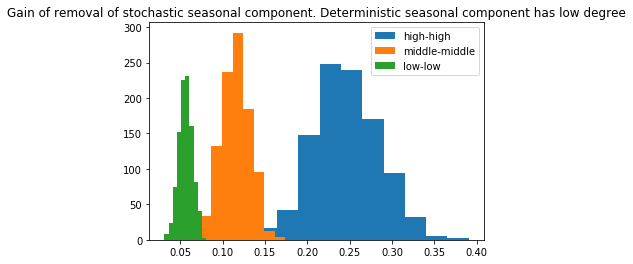

In [13]:
plt.hist(gain_1_2_d_high_high, label="high-high")
plt.hist(gain_1_2_d_middle_middle, label="middle-middle")
plt.hist(gain_1_2_d_low_low, label="low-low")
plt.legend()
plt.title("Gain of removal of stochastic seasonal component. Deterministic seasonal component has low degree")

## Question 1.2. d) (b) Removing nonseasonal stochastic component

### eta = 4

In [40]:
def gain_1_2_d(c_1_a_no_risk, c_1_a_risk):
    eta = 4
    gain = np.zeros(1000)
    for i in range(1000):
        gain[i] = (sum(np.power(0.99, range(1,481))*np.power(c_1_a_no_risk[i],(1-eta)/(1-eta)))/  sum(np.power(0.99, range(1,481))*np.power(c_1_a_risk[i],(1-eta)/(1-eta))) )**(1/(1-eta))-1 #-sum(np.power(0.99, range(1,481))*(c_1_da_eta2risk[i])**(1-eta)/(1-eta))/sum(np.power(0.99, range(1,481))))-1
    return gain

In [41]:
# middle seasonal deterministic, middle stochastic seasonas component
c_1_2_d_no_risk_middle_middle, c_1_2_d_risk_middle_middle = c_1_2_b('middle', 'middle')               
gain_1_2_d_middle_middle = gain_1_2_d(c_1_2_d_no_risk_middle_middle, c_1_2_d_risk_middle_middle)

Text(0.5,1,'Gain of removal of stochastic nonseasonal component. Seasonal components on middle degree')

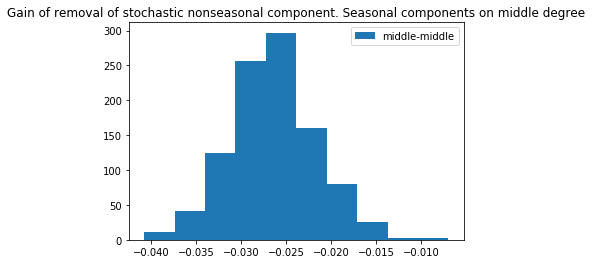

In [42]:
plt.hist(gain_1_2_d_middle_middle, label="middle-middle")
plt.legend()
plt.title("Gain of removal of stochastic nonseasonal component. Seasonal components on middle degree")

In [44]:
plt.plot(c_1_2_d_risk_low_low)

NameError: name 'c_1_2_d_risk_low_low' is not defined

# Question 2.

Assume model:
$$ max_{c_t, h_t} E_0 ( \sum_{t=0}^{\inf} \beta^t  \frac{c_t^{1-\eta}}{1-\eta}  - \kappa \frac{h_t^{1+\frac{1}{v}}}{1+\frac{1}{v}}    )  $$
such that:
$$ c_t + a_{t+1} = w_t h_t + (1+r_t - \delta) a_{t} $$

moreover assuming cobb - douglas production function ( $ \alpha = 0.66 $) and perfect competition
$$ w_t = 0.66 \frac{c_t}{h_t} $$


Welfare gain is defined as $ g $ such that:
$$ W((1+g)c_a) = W(c_b) $$
In this the case of eta = 1 (logarithmic utility function), gain is such that:
$$ E{ \sum^{40}_{t=1} \beta^{12(t-1)} [ \sum^{12}_{m=1} \beta^{m-1}[\log(1+g)c_{m,t}^{Risk} - \kappa \frac{(h_t^{Risk})^{1+\frac{1}{v}}}{1+\frac{1}{v}} ]] }= \sum^{40}_{t=1} \beta^{12(t-1)} [ \sum^{12}_{m=1} \beta^{m-1}[\log c_{m,t}^{No Risk}- \kappa \frac{(h_t^{No Risk})^{1+\frac{1}{v}}}{1+\frac{1}{v}}]] $$
thus,
$$ \sum^{40}_{t=1} \beta^{12(t-1)} \sum^{12}_{m=1} \beta^{m-1} \log (1+g) + E\sum^{40}_{t=1} \beta^{12(t-1)} \sum^{12}_{m=1} \beta^{m-1}( \log c_{m,t}^{Risk}- \kappa \frac{(h_t^{Risk})^{1+\frac{1}{v}}}{1+\frac{1}{v}}) = \sum^{40}_{t=1} \beta^{12(t-1)} [ \sum^{12}_{m=1} \beta^{m-1}[\log c_{m,t}^{No Risk}- \kappa \frac{(h_t^{No Risk})^{1+\frac{1}{v}}}{1+\frac{1}{v}}]]$$

and,
$$  \log(1+g) = \frac{\sum^{40}_{t=1} \beta^{12(t-1)} [ \sum^{12}_{m=1} \beta^{m-1}[\log c_{m,t}^{No Risk}- \kappa \frac{(h_t^{No Risk})^{1+\frac{1}{v}}}{1+\frac{1}{v}}]] - E\sum^{40}_{t=1} \beta^{12(t-1)} \sum^{12}_{m=1} \beta^{m-1} \log c_{m,t}^{Risk} - \kappa \frac{(h_t^{Risk})^{1+\frac{1}{v}}}{1+\frac{1}{v}}}{\sum^{40}_{t=1} \beta^{12(t-1)} \sum^{12}_{m=1} \beta^{m-1}} $$

so, 

$$ g = \exp({\frac{\sum^{40}_{t=1} \beta^{12(t-1)} [ \sum^{12}_{m=1} \beta^{m-1}[\log c_{m,t}^{No Risk}- \kappa \frac{(h_t^{No Risk})^{1+\frac{1}{v}}}{1+\frac{1}{v}}]] - E\sum^{40}_{t=1} \beta^{12(t-1)} \sum^{12}_{m=1} \beta^{m-1} \log c_{m,t}^{Risk}- \kappa \frac{(h_t^{Risk})^{1+\frac{1}{v}}}{1+\frac{1}{v}}}{\sum^{40}_{t=1} \beta^{12(t-1)} \sum^{12}_{m=1} \beta^{m-1}}}) - 1$$

In [16]:
def ch_2_a(g_level, var_m_level):
    alpha = 0.7
    c_no_risk = np.zeros(shape=(1000, 40*12))
    c_risk = np.zeros(shape=(1000, 40*12))
    h_no_risk = np.zeros(shape=(1000, 40*12))
    h_risk = np.zeros(shape=(1000, 40*12))
    g_deter = g(g_level)
    var_m_stoch = var_m(var_m_level)
    ln_em = np.random.normal(0,var_m_stoch, size=(1000,40,12))
    #create stochastic seasonal component for labor that is correlated with its counterpart from consumption
    ln_em_h = alpha*ln_em + (1-alpha)*np.random.normal(0,var_m_stoch, size=(1000,40,12))
    
    for i in range(1000):
        for o in range(40*12):
            c_no_risk[i][o] = np.exp(-var_u/2)*np.exp(ln_z[i])*np.exp(-var_e/2)*np.exp(ln_e[i][math.floor(o/12)][o%12])
            c_risk[i][o] = np.exp(-var_u/2)*np.exp(ln_z[i])*np.exp(g_deter[o%12])*np.exp(-var_e/2)*np.exp(ln_e[i][math.floor(o/12)][o%12])*np.exp(-var_m_stoch[o%12]/2)*np.exp(ln_em[i][math.floor(o/12)][o%12]) 
            h_no_risk[i][o] = np.exp(-var_u/2)*np.exp(ln_z[i])*np.exp(-var_e/2)*np.exp(ln_e[i][math.floor(o/12)][o%12])
            h_risk[i][o] = np.exp(-var_u/2)*np.exp(ln_z[i])*np.exp(g_deter[o%12])*np.exp(-var_e/2)*np.exp(ln_e[i][math.floor(o/12)][o%12])*np.exp(-var_m_stoch[o%12]/2)*np.exp(ln_em_h[i][math.floor(o/12)][o%12]) 
    return c_no_risk, c_risk, h_no_risk, h_risk

def gain_2_a(c_no_risk, c_risk, h_no_risk, h_risk):
    kappa=1
    gain = np.zeros(1000)
    for i in range(1000):
        gain[i] = np.exp((sum(np.power(0.99, range(1,481))*(np.log(c_no_risk[i])-kappa*h_no_risk[i]**(2)/2))-sum(np.power(0.99, range(1,481))*(np.log(c_risk[i])-kappa*h_no_risk[i]**(2)/2)))/sum(np.power(0.99, range(1,481))))-1
    return gain

In [18]:
# high seasonal deterministic, high stochastic seasonas component
c_2_a_no_risk_low_high, c_2_a_risk_low_high, h_2_a_no_risk_low_high, h_2_a_risk_low_high = ch_2_a('high', 'high')         
gain_2_a_low_high = gain_2_a(c_2_a_no_risk_low_high, c_2_a_risk_low_high, h_2_a_no_risk_low_high, h_2_a_risk_low_high)

# middle seasonal deterministic, middle stochastic seasonas component
c_2_a_no_risk_low_middle, c_2_a_risk_low_middle, h_2_a_no_risk_low_middle, h_2_a_risk_low_middle = ch_2_a('middle', 'middle')               
gain_2_a_low_middle = gain_2_a(c_2_a_no_risk_low_middle, c_2_a_risk_low_middle, h_2_a_no_risk_low_middle, h_2_a_risk_low_middle)

# low seasonal deterministic, low stochastic seasonas component
c_2_a_no_risk_low_low, c_2_a_risk_low_low, h_2_a_no_risk_low_low, h_2_a_risk_low_low = ch_2_a('low', 'low')          
gain_2_a_low_low = gain_2_a(c_2_a_no_risk_low_low, c_2_a_risk_low_low, h_2_a_no_risk_low_low, h_2_a_risk_low_low)

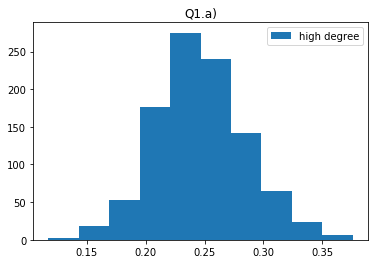

In [22]:
plt.hist(gain_2_a_low_high, label="high degree")
plt.title("Q1.a)")
plt.legend()

#Actually all HHs get the same welfare gain which is negligible

Text(0.5,1,'Gain of removal of stochastic seasonal component. Deterministic seasonal component has low degree')

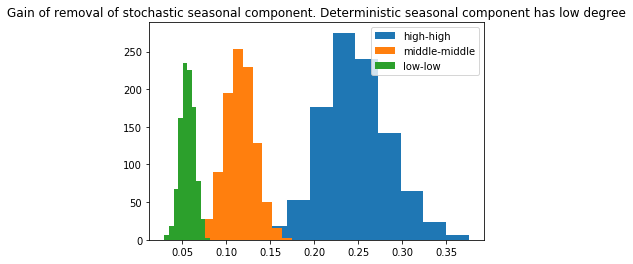

In [21]:
plt.hist(gain_2_a_low_high, label="high-high")
plt.hist(gain_2_a_low_middle, label="middle-middle")
plt.hist(gain_2_a_low_low, label="low-low")
plt.legend()
plt.title("Gain of removal of stochastic seasonal component. Deterministic seasonal component has low degree")

# Question 3.

In [1]:
#import pandas as pd
#import numpy as np
import statsmodels.formula.api as sm

In [4]:
data = pd.read_stata('C:/Users/adamw/Desktop/Development/PS2/dataUGA.dta')

data['log_wage'] = np.log(data["wage_total"])
data['log_consum'] = np.log(data["ctotal"])

C:\Users\adamw\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [10]:
data.columns

Index(['age', 'age_sq', '_aggregate', 'agr_share', 'bednet', 'bs_profit',
       'bus_share', 'businessman', 'cfood', 'classeduc', 'climate', 'cnodur',
       'ctotal', 'ctotal_dur', 'ctotal_gift', 'd_aggregate', 'd_climate',
       'd_health', 'd_idiosyn', 'd_job', 'd_pests', 'd_prices', 'd_shock',
       'ethnic', 'familysize', 'farmer', 'father_educ', 'father_ocup',
       'female', 'health', 'hh', 'idiosyn', 'illdays', 'inctotal',
       'inctotal_trans', 'index', 'inflation', 'job', 'lnbs_profit', 'lnc',
       'lncfood', 'lncnodur', 'lnctotal_dur', 'lnctotal_gift',
       'lninctotal_trans', 'lnother_net', 'lnprofit_agr', 'lnprofit_agrb',
       'lnprofit_ls', 'lntotal_agrls', 'lnwage_total', 'lny', 'month',
       'ocupation', 'other_inc', 'other_net', 'pests', 'prices', 'profit_agr',
       'profit_agrb', 'profit_ls', 'region', 'region2', 'region3', 'region4',
       'sex', 'shock', 'sregion', 'total_agrls', 'u_c', 'u_y', 'urban',
       'w_share', 'wage_total', 'wave', 'worker

In [11]:
data.head()

,age,age_sq,_aggregate,agr_share,bednet,bs_profit,bus_share,businessman,cfood,classeduc,...,wage_total,wave,worker,writeread,year,avgc,counthh,lnc_nogift,log_wage,log_consum
0,44.0,1936.0,0.0,NaN,1.0,NaN,NaN,NaN,1159.316322,13.0,...,NaN,2009-2010,NaN,0.0,2009.0,7.227382,4,7.336252,NaN,7.336252
1,34.0,1156.0,0.0,NaN,0.0,NaN,NaN,NaN,1039.792053,15.0,...,NaN,2009-2010,NaN,0.0,2009.0,7.227382,4,7.170604,NaN,7.223137
2,38.0,1444.0,0.0,-0.019425,1.0,405.796317,0.369075,1.0,888.480357,17.0,...,715.055826,2009-2010,1.0,0.0,2010.0,7.227382,3,7.087835,6.572361,7.119439
3,31.0,961.0,0.0,NaN,0.0,NaN,NaN,0.0,63.859526,15.0,...,208.557949,2009-2010,1.0,1.0,2010.0,7.227382,1,5.213175,5.340217,5.213175
4,39.0,1521.0,0.0,0.000000,0.0,427.419696,0.117192,0.0,4440.997495,36.0,...,3219.752569,2009-2010,1.0,0.0,2010.0,7.227382,2,9.256837,8.077060,9.425398


# MEAN

In [5]:

data_grouped = data.groupby(['age', 'year', 'month'])[['log_wage', 'log_consum', 'age', 'year', 'month']].mean()

# creating dummies for age 15-25, 26-45, 46-99
data_grouped['age15_25'] = ((data_grouped["age"] >=15) & (data_grouped["age"] <=25)).astype(int)
data_grouped['age26_45'] = ((data_grouped["age"] >=26) & (data_grouped["age"] <=45)).astype(int)
data_grouped['age46_99'] = ((data_grouped["age"] >=46) & (data_grouped["age"] <=99)).astype(int)

# creating dummies for months 1-3, 4-6, 7-9, 10-12
data_grouped['month1_3'] = ((data_grouped["month"] >=1) & (data_grouped["month"] <=3)).astype(int)
data_grouped['month4_6'] = ((data_grouped["month"] >=4) & (data_grouped["month"] <=6)).astype(int)
data_grouped['month7_9'] = ((data_grouped["month"] >=7) & (data_grouped["month"] <=9)).astype(int)
data_grouped['month10_12'] = ((data_grouped["month"] >=10) & (data_grouped["month"] <=12)).astype(int)

# creating dummies for years 2009-2014
data_grouped['year2009'] = ((data_grouped["year"] >=2009) & (data_grouped["year"] <=2009)).astype(int)
data_grouped['year2010'] = ((data_grouped["year"] >=2010) & (data_grouped["year"] <=2010)).astype(int)
data_grouped['year2011'] = ((data_grouped["year"] >=2011) & (data_grouped["year"] <=2011)).astype(int)
data_grouped['year2012'] = ((data_grouped["year"] >=2012) & (data_grouped["year"] <=2012)).astype(int)
data_grouped['year2013'] = ((data_grouped["year"] >=2013) & (data_grouped["year"] <=2013)).astype(int)
data_grouped['year2014'] = ((data_grouped["year"] >=2014) & (data_grouped["year"] <=2014)).astype(int)

In [8]:
# OLS for log_wage
result = sm.ols(formula="log_wage ~  age26_45 + age46_99 + month4_6 + month7_9 +month10_12 +year2010 + year2011 + year2012 +year2013 +year2014", data=data_grouped).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     9.472
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           1.59e-15
Time:                        19:03:58   Log-Likelihood:                -3363.7
No. Observations:                1936   AIC:                             6749.
Df Residuals:                    1925   BIC:                             6811.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5130      0.180     30.712      0.0

In [9]:
# OLS for log_consum
data_grouped['log_consum'] = data_grouped['log_consum'].mask(data_grouped['log_consum'] < 0, 0)
result1 = sm.ols(formula="log_consum ~  age26_45 + age46_99 + month4_6 + month7_9 +month10_12 +year2010 + year2011 + year2012 +year2013 +year2014", data=data_grouped).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:             log_consum   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     9.009
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           9.20e-15
Time:                        19:04:25   Log-Likelihood:                -2700.9
No. Observations:                2857   AIC:                             5424.
Df Residuals:                    2846   BIC:                             5489.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9061      0.066    104.851      0.0